Natural Language Processing Mid-Term Project
==

I. Introduction
==
Since the outbreak of covid-19 at the end of the year 2019, the world went into lockdown, everyone had to stay in place and shelter in their homes to lower the spread of the deadly disease. Thus, tourism took a back seat, no one could travel overseas for holidays and vacations,this led to airlines taking a big hit to their profits due to no one taking flights overseas.  

Now, the world is finally returning to normal after the covid-19 pandemic, borders are opening up again and many countries are looking to reinvigorate their tourism industry, more and more people trying to find flights to other countries to take their long awaited holidays and vacations overseas.
The airline industry plays a major role in connecting people across countries, with millions of passengers everyday, airlines strive to provide good customer experiences to maintain their reputation and be competitive. Similarly customers also look for the best airlines when travelling so as to have a good start and end to their holidays.

With today's age of social media, and multiple outlets of information, passengers can very easily share their opinions online. Both airlines and their passengers can extract important information from these opinions, such as why passengers are choosing a certain airline over another airline.

The analysis of airline reviews using sentiment analysis can extract the sentiment or attitude of the opinions posted on social media platforms or other websites. Sentiment analysis can identify trends and areas for improvement, influencing both airlines and passengers in their decision making process, leading to passengers choosing a certain airline over another, or airline making changes to better suit the passengers.

Using sentiment analysis for airline reviews can pose certain challenges, as the reviews tend to be in natural language which has high complexity and is very nuanced. Passengers write their reviews with a wide range of vocabulary, sometimes using sarcasm and references. Furthermore, the airline reviews contain specific terminology, requiring domain knowledge relating to flights for accurate sentiment analysis.

Sentiment analysis for airline reviews can be a powerful tool for airlines to identify actionable insights from reviews, to make changes to enhance customer experience, for the passengers sentiment analysis can help to identify why certain airlines are more popular and trustworthy when going overseas.


Domain-Specific area
--
With the growing number of passengers, there is also a significant growth in airline reviews. With every passenger leaving their reviews online it can be hard to tell what the consensus is for an airline without going through each website or social media platform and reading through each and every review of an airline.

Text classification with a sentiment analysis model, would automate the process of categorising and organising the large amount of reviews. By training the model of airline reviews, the model would then be able to categorise reviews into positive, negative or neutral. This allows both the passenger and airline to obtain a consensus.

The trained sentiment analysis model can also provide real time analysis of reviews, giving continuous feedback allowing for prompt response to negative reviews.

with a generalised sentiment analysis model for airline reviews, comparative analysis across airlines would allow passengers to identify the strengths and weaknesses of each airline, giving them the choice to make an informed decision for their transportation of choice.

By using a sentiment analysis model to reduce the time needed to go through reviews, allows for extraction of valuable insights to make data-driven decisions, improving time and allowing airlines to proactively address passenger needs, and passengers can also select the airline which best suits them.


Objectives
--
As per aforementioned, the objective is to design and implement a tailored sentiment analysis model for airline reviews which can accurately categorise airline reviews into positive, negative and neutral reviews. 

To allow the model to extract the correct features of each airline review, data preprocessing must be done, ensuring meaningless and redundant data is removed and pruned, feeding the model only appropriate data.

Choosing a baseline to beat will help verify that the model is able to perform well, and ensure that the model is improving.

Proper selection of a machine learning model must be done, to ensure that the model is suited to sentiment analysis, in this project it would be a problem of multiclass single label classification.

To achieve the above stated, the model would need to be trained on a dataset of airline reviews, then the model hyper parameter can be tuned as required.

Data visualisation will be done to provide insights on the data being used to train the model, as well as to visualise the result of the model, to display its efficacy in categorising airline reviews.

With the created sentiment analysis model, categorisation of airline reviews can be automated, allowing efforts to be reallocated to create a better customer experience and passengers will be able to find the best airline.


Dataset
--
The dataset for the project is sourced from kaggle, originating from www.crowdflower.com/data-for-everyone, the data was scraped from twitter in February 2015, all the tweets that were scraped were also classified and labelled as positive, negative or neutral, followed by categorising negative reason. Since then the dataset has been slightly reformatted, and is in CSV format.

The CSV file has 15 columns of different data types, and a total of 14640, rows total.

Columns with text values are the tweets’s sentiment, the reason for negative sentiment, the airline, the name of the person who made the tweet, the tweet’s text and the tweet’s location and timezone

Columns containing numerical values are, tweet’s ID, sentiment confidence values, retweet count.

The Column containing date value is just the tweet creation date.

The data has to be pre processed prior to feeding it to a model for training, only after that exploratory data analysis can be done on the dataset.


Evaluation Methodology
--
To verify the model is performing well, evaluation against it would have to be done. To do this, the model's accuracy, precision, recall and F1 score, confusion matrix will be used as its evaluation metrics.

Accuracy score of the model will measure how many predictions the model can make correctly, calculated by dividing the correct predictions the model makes by all predictions made. Having a good accuracy means that our model is trained well and can make correct predictions.

Precision measures how often the model makes correct predictions and has false positives. the model having a high precision would make the threshold of the classifier higher, reducing the number of false positives 

Recall measures how often correct predictions are wrong and have false negatives. Having a high recall means that there will be fewer false negatives, as the model threshold would be lower, making more classification as positive.

F1 score combines is the balance of precision and recall, having a high f1 score would mean that we have both precision and recall.

Confusion matrix put everything together in a visualisation in table form.


II. Implementation
==
Data Preprocessing
--
To ensure the model is fed with good data that has features that can be extracted, the data has to be preprocessed.

In the following section, cleaning that data would be done.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
#import data
data = pd.read_csv('datasets/Tweets.csv')

In [3]:
#show total rows and columns of data
data.shape

(14640, 15)

In [4]:
#view the first 5 rows of data
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
#view columns of the data
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [6]:
#check info the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

As can be seen above, each column's data type. No action to change any data type is required.

In [7]:
#check for null values in the data
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

As can be seen from the above, there a multiple rows with null values, however, filling them in might cause the machine learning model to pick up the wrong pattern so for now they will be left blank.

Important column that will be used such as, text is not empty thus the dataset is still usable.

In [8]:
print("Percentage null or na values in df")
((data.isnull() | data.isna()).sum() * 100 / data.index.size).round(2)

Percentage null or na values in df


tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

The columns, airline_sentiment_gold, negativereason_gold have more than 99% missing data as well as tweet_coord have nearly 93% missing data. 

Removing these columns would do no harm as they will not provide and constructive insights.

In [9]:
#del columns that are not needed
del data['tweet_coord']
del data['airline_sentiment_gold']
del data['negativereason_gold']

In [10]:
negreason_freq = data.groupby('negativereason').size()
negreason_freq

negativereason
Bad Flight                      580
Can't Tell                     1190
Cancelled Flight                847
Customer Service Issue         2910
Damaged Luggage                  74
Flight Attendant Complaints     481
Flight Booking Problems         529
Late Flight                    1665
Lost Luggage                    724
longlines                       178
dtype: int64

Even though the negative reason column has empty rows, this can be attributed to the design of the data, thus the data will be left as is and not fill in the blank spaces so as to not skew the data.

Data Visualisation
--
Data visualisation can help to give insights into the data, allowing for feature selections to train the model on.

In the following section interesting points of the data will be shown.

Text(0.5, 1.0, 'Count of Type of Sentiment')

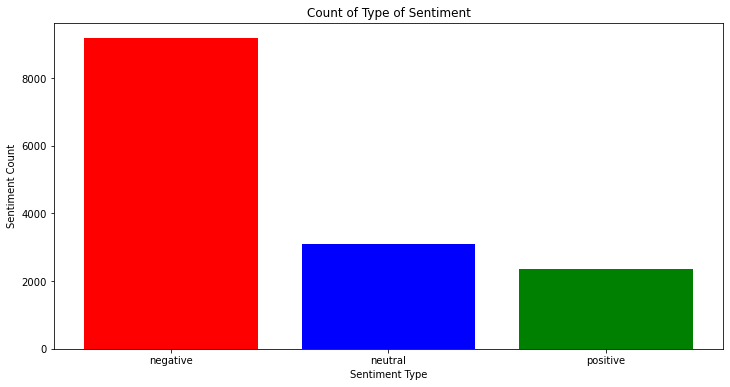

In [11]:
counter = data.airline_sentiment.value_counts()
index = [1,2,3]
plt.figure(1,figsize=(12,6))
plt.bar(index,counter,color=['red','blue','green'])
plt.xticks(index,['negative','neutral','positive'],rotation=0)
plt.xlabel('Sentiment Type')
plt.ylabel('Sentiment Count')
plt.title('Count of Type of Sentiment')

It can be observed that most of the reviews are negative.

In [12]:
#check unqiue airlines in dataset
data['airline'].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

Total number of tweets for each airline 
  airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


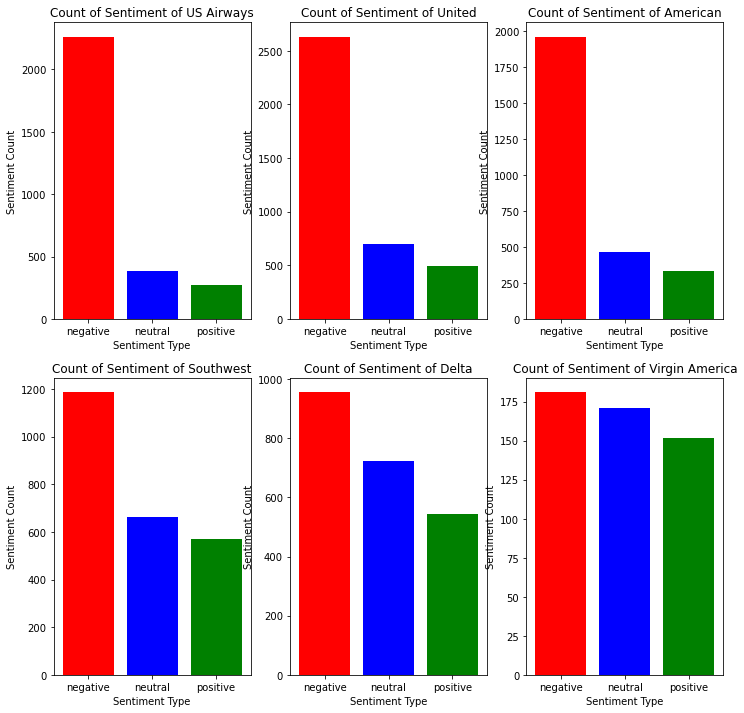

In [13]:
print("Total number of tweets for each airline \n ",data.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
plt.figure(1,figsize=(12, 12))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    new_df=data[data['airline']==i]
    count=new_df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count, color=['red', 'blue', 'green'])
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Sentiment Count')
    plt.xlabel('Sentiment Type')
    plt.title('Count of Sentiment of '+i)

Next to reduce the amount of data that the model has to go through, text cleaning will be done.

Removing stop words, words with little to no meaning in a sentence,

In [14]:
def clean_tweets(tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words ))

In [15]:
nltk.download('stopwords')
data['clean_tweets'] = data['text'].apply(lambda x: clean_tweets(x))

[nltk_data] Downloading package stopwords to C:\Users\Grego
[nltk_data]     Laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
x = data.clean_tweets
y = data.airline_sentiment

print(len(x), len(y))

14640 14640


Baseline model
--

For the baseline model, an SVM will be employ SVM are easy to deploy and use for text classification as they generalise well with high dimensional space.

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

Convert the tweets into a matrix of token counts, creating a bag of words for the SVM

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(x_train)

CountVectorizer()

In [19]:
#convert and store training and test data into matrix
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)

In [20]:
vect_tunned = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)
vect_tunned

CountVectorizer(max_df=0.7, max_features=100, min_df=0.1, ngram_range=(1, 2),
                stop_words='english')

In [21]:
#training SVM model with linear kernel
#Support Vector Classification-wrapper around SVM
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', random_state = 10)
svm_model.fit(x_train_dtm, y_train)
#predicting output for test data
pred = svm_model.predict(x_test_dtm)

In [22]:
#accuracy score
acc = accuracy_score(y_test,pred)


print('Accuracy  : {:.4f}'.format(acc))

Accuracy  : 0.7730


In [23]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

    negative       0.85      0.87      0.86      2340
     neutral       0.56      0.54      0.55       738
    positive       0.72      0.70      0.71       582

    accuracy                           0.77      3660
   macro avg       0.71      0.70      0.71      3660
weighted avg       0.77      0.77      0.77      3660



The baseline model performance is quite high, all the accuracies are above 0.33, meaning that the model performs better than random labelling, as there are just 3 classes.

Improved Model
--
With the improved model, Using a LSTM allows for customisation and building a model that can cater to the task at hand. The objective for this model is to beat the baseline model and be more accurate than the baseline model.

LSTM is a form of Recurrent Neural Network which is suited to text classification as they have a short term memory, meaning they can increase their performance by memorising relevant information.


In [24]:
#import required libraries
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Bidirectional,Embedding, Dropout, Conv1D, MaxPooling1D
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping

Preprocess text differently for the LSTM

In [25]:
max_words = 5000
max_len = 100

def tokenize_pad_sequences(text):

    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

X, tokenizer = tokenize_pad_sequences(data['clean_tweets'])

In [26]:
y = pd.get_dummies(data.airline_sentiment)
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, test_size=0.3, random_state=42, stratify=y_trn)


In [27]:
vocab_size = 5000
embedding_size = 32
epochs=50

lstm_model = Sequential()
lstm_model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
lstm_model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
lstm_model.add(MaxPooling1D(pool_size=2))
lstm_model.add(Bidirectional(LSTM(32)))
lstm_model.add(Dropout(0.4))
lstm_model.add(Dense(3, activation='softmax'))

building the model as shown above, consisting of an embbedding layer, convolution layer, max pooling layer, LSTM layer, dropout and dense layer

model loss function is categorical_crossentropy as multi label classification and optimiser for the model is adam.

In [28]:
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(lstm_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           160000    
                                                                 
 conv1d (Conv1D)             (None, 100, 32)           3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 50, 32)           0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 3)                 1

In [29]:
es = EarlyStopping(monitor = 'val_loss', patience=5)
batch_size = 64

history = lstm_model.fit(X_trn, y_trn,
                    validation_data=(X_vld, y_vld),
                    batch_size=batch_size, epochs=epochs, verbose=1,
                    callbacks = [es])

Epoch 1/50
129/129 [==============================] - 5s 22ms/step - loss: 0.8432 - accuracy: 0.6387 - val_loss: 0.6614 - val_accuracy: 0.7223
Epoch 2/50
129/129 [==============================] - 2s 19ms/step - loss: 0.5843 - accuracy: 0.7538 - val_loss: 0.5945 - val_accuracy: 0.7629
Epoch 3/50
129/129 [==============================] - 6s 45ms/step - loss: 0.4645 - accuracy: 0.8147 - val_loss: 0.6006 - val_accuracy: 0.7681
Epoch 4/50
129/129 [==============================] - 3s 24ms/step - loss: 0.3866 - accuracy: 0.8562 - val_loss: 0.6295 - val_accuracy: 0.7607
Epoch 5/50
129/129 [==============================] - 5s 41ms/step - loss: 0.3107 - accuracy: 0.8878 - val_loss: 0.6888 - val_accuracy: 0.7701
Epoch 6/50
129/129 [==============================] - 4s 29ms/step - loss: 0.2474 - accuracy: 0.9149 - val_loss: 0.7575 - val_accuracy: 0.7738
Epoch 7/50
129/129 [==============================] - 6s 43ms/step - loss: 0.1941 - accuracy: 0.9354 - val_loss: 0.8212 - val_accuracy: 0.7655

In [30]:
# Evaluate model on the test set
loss, accuracy = lstm_model.evaluate(X_tst, y_tst, verbose=0)

print('Accuracy  : {:.4f}'.format(accuracy))

Accuracy  : 0.7657


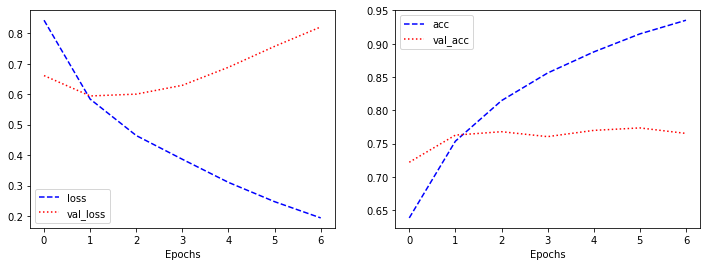

In [31]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b--', label = 'loss')
plt.plot(history.history['val_loss'], 'r:', label = 'val_loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b--', label = 'acc')
plt.plot(history.history['val_accuracy'], 'r:', label = 'val_acc')
plt.xlabel('Epochs')
plt.legend()

plt.show()

as can be seen from the graph the model is overfitting,and losing accuracy on validation tests.

92/92 [==============================] - 1s 4ms/step


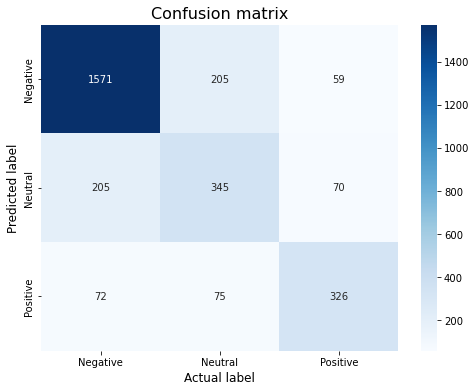

In [32]:
from sklearn.metrics import confusion_matrix

#plot confusion matrix for the passed model and the data
def plot_confusion_matrix(model, X_test, y_test):
    
    
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    # use model to do the prediction
    y_pred = lstm_model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(lstm_model, X_tst, y_tst)


III. Conclusions
==

Evaluation
--
From the metrics of each classifier both of them perform better than random.

The SVM got an accuracy of 0.7730 while the LSTM model got an accuracy of 0.7657.

Both of the model would be useful to evaluate the sentiments of reviews, both model can be further improved by training them on larger datasets.

The SVM model would hit a maximum of training however, with the LSTM model, more layers can be added and training can be done for more epochs, the accuracy still can be increased.

The LSTM would still be a more perferable model with time as customising can be done will the SVM model cannot be further improved by itself, just increasing training data would come to a limit.


Summary 
--
Accurate review classification would let airline and passengers know the status of the airline, airlines can make effective data driven decision making to apply effort into the correct places, keeping passengers happy and thus increasing their profits further.

This help both parties out, and can promote the interconnectiveity of the world as a whole.

The LSTM model is very basic in this project and not very generalised, but with an even larger dataset and more time training, the model can more generalised for sentiment analysis. LSTM models are suited to the task of text classification as they are RNNs, since it is built from the ground up it can be easliy adjusted to different training data.



References
--

“Twitter US Airline Sentiment.” Www.kaggle.com, www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment.

